# PISA Exploration
## by Zack Tobin

## Preliminary Wrangling

The PISA data consists of a survey of students' skills and knowledge as they approach the end of compulsory education. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. This dataset consists of over 2 million rows and 636 columns.

In [65]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [66]:
df = pd.read_csv('pisa2012.csv', sep=',', encoding='latin-1', error_bad_lines=False, index_col=False, dtype='unicode')
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


### What is the structure of your dataset?
There are 48490 variables and 636 options


### What is/are the main feature(s) of interest in your dataset?
I mainly want to see what impacts a student's test scores more, how wealthy they are versus how hard they study. 
> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The first thing I want to compare are the study habits and Math, Science scores of students who live in an OECD country compared those who don't live in a OECD country. The OECD is the Oraganization for Economic Co-operation and Development. It primarily consists of wealthy countries like the USA, Canada, Australia, and Western Europe. Then I will be looking at the direct correlation wealth has to a student's scores, in comparison to how many a hours a student studies at home per week. Lastly I will be looking for specific resources like that a wealthier student might have, such as a textbook or inernet connection, and see how that impacts their scores.

In [67]:
df.shape
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: object(636)
memory usage: 2.3+ GB


Unnamed: 0    object
CNT           object
SUBNATIO      object
STRATUM       object
OECD          object
               ...  
W_FSTR80      object
WVARSTRR      object
VAR_UNIT      object
SENWGT_STU    object
VER_STU       object
Length: 636, dtype: object

In [68]:
columns = ['CNT', 'OECD', 'STIDSTD', 'ST04Q01', 'WEALTH', 'OUTHOURS', 'PV1MATH', 'PV1READ', 'PV1SCIE','ST26Q10','IC02Q04']
df = df[columns]
#rename columns
Col_dict = {'CNT':'Country', 'OECD':'OECD', 'STIDSTD':'Student_ID','ST04Q01':'gender', 'ST01Q01':'Grade',
                             'WEALTH':'wealth_index', 'OUTHOURS':'Hrs_Studied_At_Home', 'PV1MATH':'Math', 'PV1READ':'Reading',
                             'PV1SCIE':'Science', 'ST26Q10':'Textbooks', 'IC02Q04':'Internet at school'}
Col_dict

{'CNT': 'Country',
 'OECD': 'OECD',
 'STIDSTD': 'Student_ID',
 'ST04Q01': 'gender',
 'ST01Q01': 'Grade',
 'WEALTH': 'wealth_index',
 'OUTHOURS': 'Hrs_Studied_At_Home',
 'PV1MATH': 'Math',
 'PV1READ': 'Reading',
 'PV1SCIE': 'Science',
 'ST26Q10': 'Textbooks',
 'IC02Q04': 'Internet at school'}

In [69]:
df.rename(columns = Col_dict, inplace =True)
df.head()


,Country,OECD,Student_ID,gender,wealth_index,Hrs_Studied_At_Home,Math,Reading,Science,Textbooks,Internet at school
0,Albania,Non-OECD,00001,Female,-2.92,NaN,406.8469,249.5762,341.7009,Yes,NaN
1,Albania,Non-OECD,00002,Female,0.69,8,486.1427,406.2936,548.9929,Yes,NaN
2,Albania,Non-OECD,00003,Female,-0.23,24,533.2684,401.21,499.6643,Yes,NaN
3,Albania,Non-OECD,00004,Female,-1.17,17,412.2215,547.363,438.6796,Yes,NaN
4,Albania,Non-OECD,00005,Female,-1.17,NaN,381.9209,311.7707,361.5628,Yes,NaN


In [92]:
#Change data to integers
df['Hrs_Studied_At_Home'] = pd.to_numeric(df['Hrs_Studied_At_Home'], errors='coerce')
df['Math'] = pd.to_numeric(df['Math'], errors='coerce')
df['Reading'] = pd.to_numeric(df['Reading'], errors='coerce')
df['Science'] = pd.to_numeric(df['Science'], errors='coerce')
df['wealth_index'] = pd.to_numeric(df['wealth_index'], errors='coerce')

In [95]:
df['Science'].mean()
df['Reading'].mean()

472.2065741500448

In [96]:
#Drop outlier Hrs_Studied_At_Home
df.drop(df[df['Hrs_Studied_At_Home']>40].index,inplace=True)

## Univariate Exploration

> In this section I want to see a student's test scores in Math, Reading and Science. I also want to learn what impact economic development has on a student, so for now I want to see how often kids from OECD countries study compared to students from Non-OECD countries.  

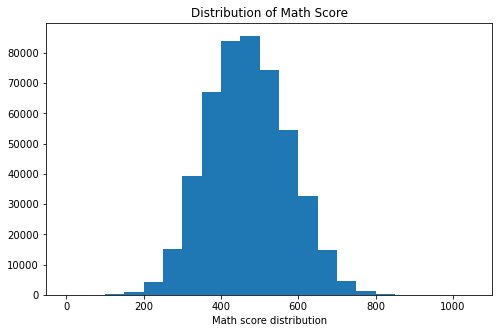

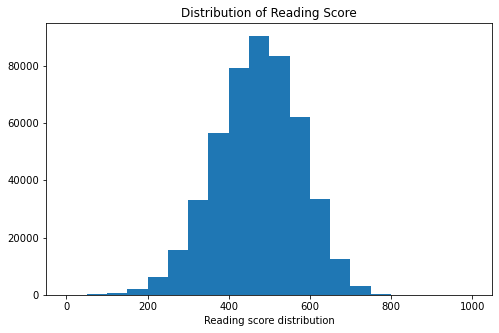

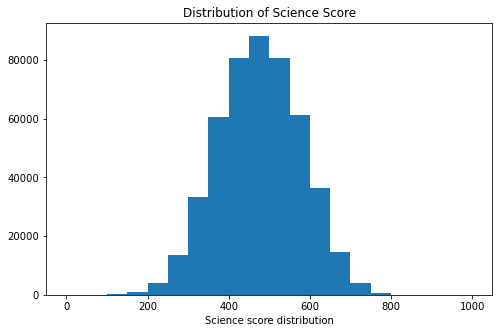

In [97]:

binsize= 50
bins= np.arange(0, df['Math'].max() + 100, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Math', bins = bins)
plt.title("Distribution of Math Score")
plt.xlabel('Math score distribution')
plt.show()


binsize= 50
bins= np.arange(0, df['Reading'].max() + 100, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Reading', bins = bins)
plt.title("Distribution of Reading Score")
plt.xlabel('Reading score distribution')
plt.show()

binsize= 50
bins= np.arange(0, df['Science'].max() + 100, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Science', bins = bins)
plt.title("Distribution of Science Score")
plt.xlabel('Science score distribution')
plt.show()


In [73]:
print(df['Math'].mean())
print(df['Reading'].mean())
print(df['Science'].mean())

469.79045834057126
472.2065741500448
475.96118185794137


<AxesSubplot:xlabel='Textbooks', ylabel='count'>

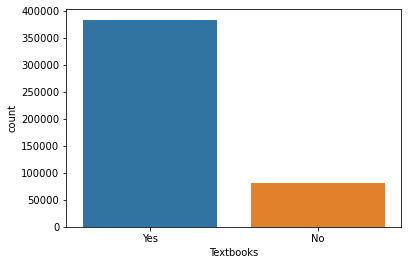

In [74]:
df['Textbooks'].value_counts()

sb.countplot(data=df, x='Textbooks')

<AxesSubplot:xlabel='Internet at school', ylabel='count'>

/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


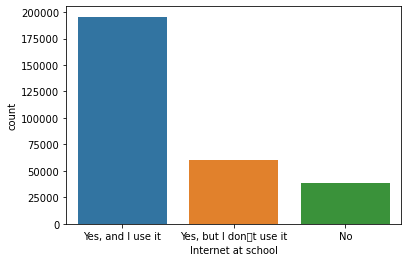

In [75]:
sb.countplot(data=df, x='Internet at school')

In [76]:
df['Hrs_Studied_At_Home'].describe()

count    302362.000000
mean         10.176851
std           8.063236
min           0.000000
25%           4.000000
50%           8.000000
75%          14.000000
max          40.000000
Name: Hrs_Studied_At_Home, dtype: float64

This shows that the math, reading, and science score are all normally distributed. This isn't terribly surprising.

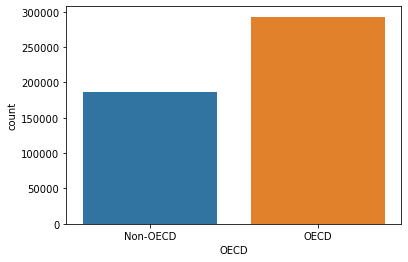

In [77]:
sb.countplot(data=df, x='OECD');

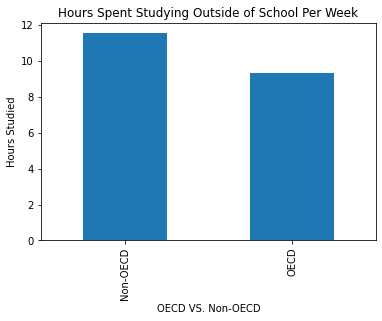

OECD
Non-OECD    11.543696
OECD         9.342894
Name: Hrs_Studied_At_Home, dtype: float64

In [78]:
OECD_Study = df.groupby('OECD')['Hrs_Studied_At_Home'].mean()
OECD_Study.plot.bar()
plt.xlabel('OECD VS. Non-OECD')
plt.ylabel('Hours Studied')
plt.title('Hours Spent Studying Outside of School Per Week')
plt.show()
OECD_Study

While the data does have twice as many students from OECD countries, it is interesting and noteworthy that actually students from non-oecd countries actually study four hour more per weak

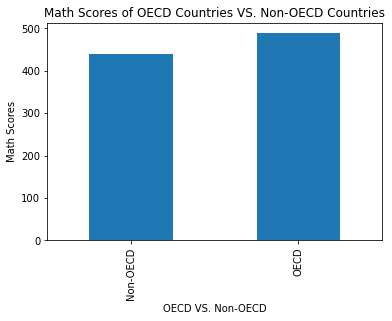

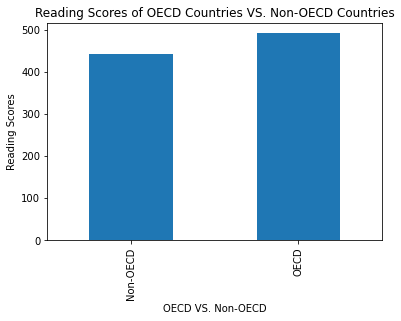

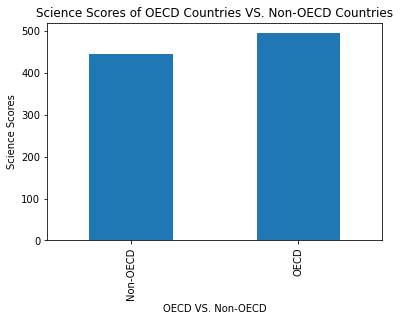

In [79]:
OECD_Math = df.groupby('OECD')['Math'].mean()
OECD_Math.plot.bar()
plt.xlabel('OECD VS. Non-OECD')
plt.ylabel('Math Scores')
plt.title('Math Scores of OECD Countries VS. Non-OECD Countries')
plt.show()

OECD_Reading = df.groupby('OECD')['Reading'].mean()
OECD_Reading.plot.bar()
plt.xlabel('OECD VS. Non-OECD')
plt.ylabel('Reading Scores')
plt.title('Reading Scores of OECD Countries VS. Non-OECD Countries')
plt.show()

OECD_Science = df.groupby('OECD')['Science'].mean()
OECD_Science.plot.bar()
plt.xlabel('OECD VS. Non-OECD')
plt.ylabel('Science Scores')
plt.title('Science Scores of OECD Countries VS. Non-OECD Countries')
plt.show()


This shows that despite the fact that students from Non-OECD countries study more outside of school, their test results are worse. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The most unusual and noteworthy think I found was that despite the fact that kids from Non-OECD countries study 4 more hours a week they still receive worse test scores. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

In the last section I found that while on average Non-OECD countries studied harder than OECD countries, OECD countries still scored better on tests. I now want to dig a bit deeper and see the exact relationship between wealth and one's test scores. I also want to see which countries tend to score the best, 

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

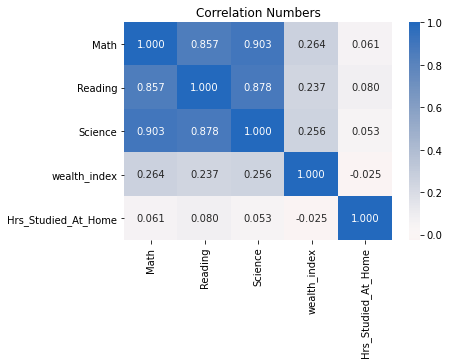

In [81]:
numeric_vars = ['Math', 'Reading', 'Science', 'wealth_index', 'Hrs_Studied_At_Home']
sb.heatmap(df[numeric_vars].corr(),
           annot=True,
           fmt='.3f',
           cmap='vlag_r',
           center=0)
plt.yticks(rotation=0)
plt.title('Correlation Numbers');

As we can see here there is a strong correlation between scoring well in all 3 tests, meaning that if you did well in Math you are more likely to have done well in Reading and Science. There is a small correlation between studying hard and getting better test scores, however the correlation between test scores and wealth index is 3 times stronger 

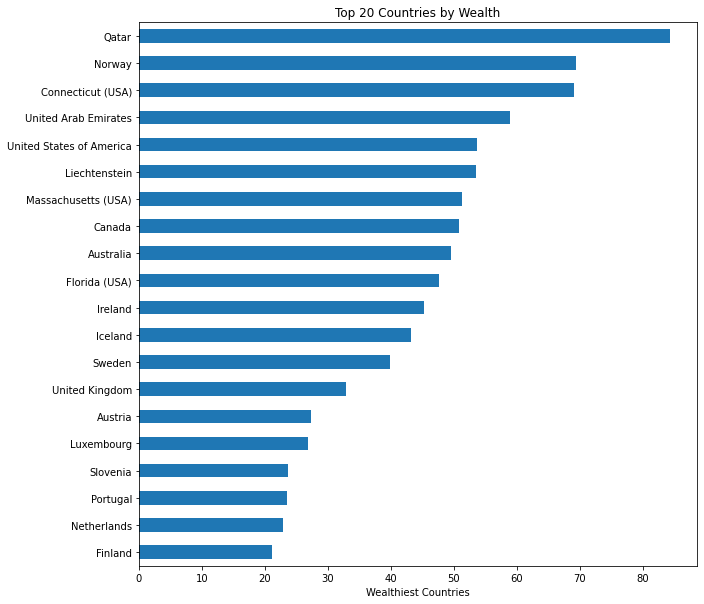

In [82]:
# Find percentage of wealthy by country
wealth = df.groupby('Country').wealth_index.mean().mul(100)

# Plot
plt.figure(figsize=[10, 10])
wealth.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Countries by Wealth')
plt.xlabel('Wealthiest Countries')
plt.ylabel(None);


As seen here 16 of the 20 wealthiest countries in the world are part of the OECD.

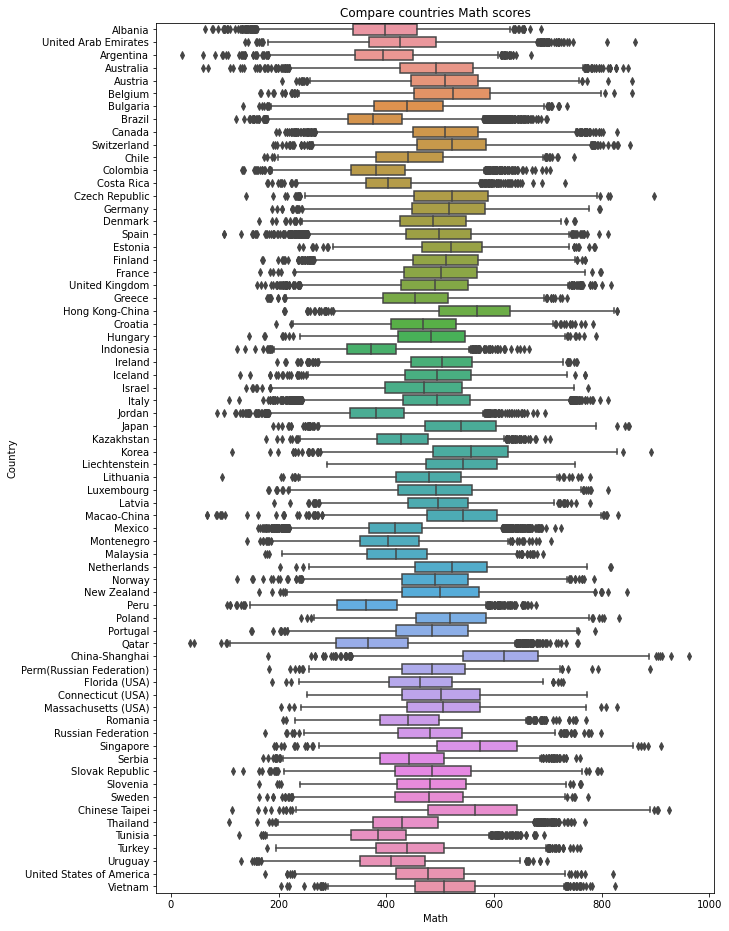

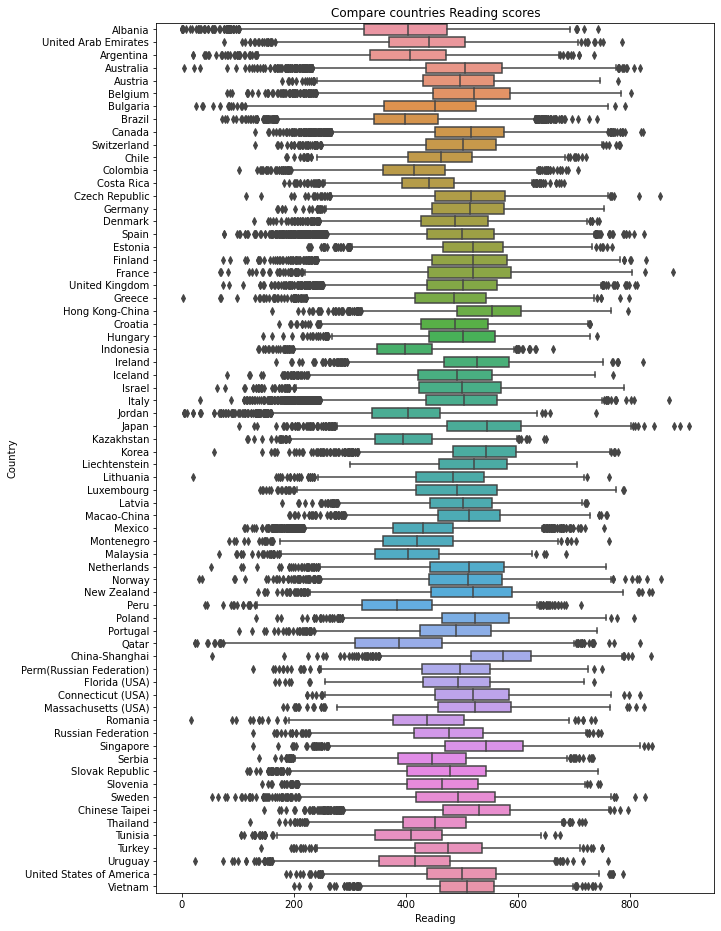

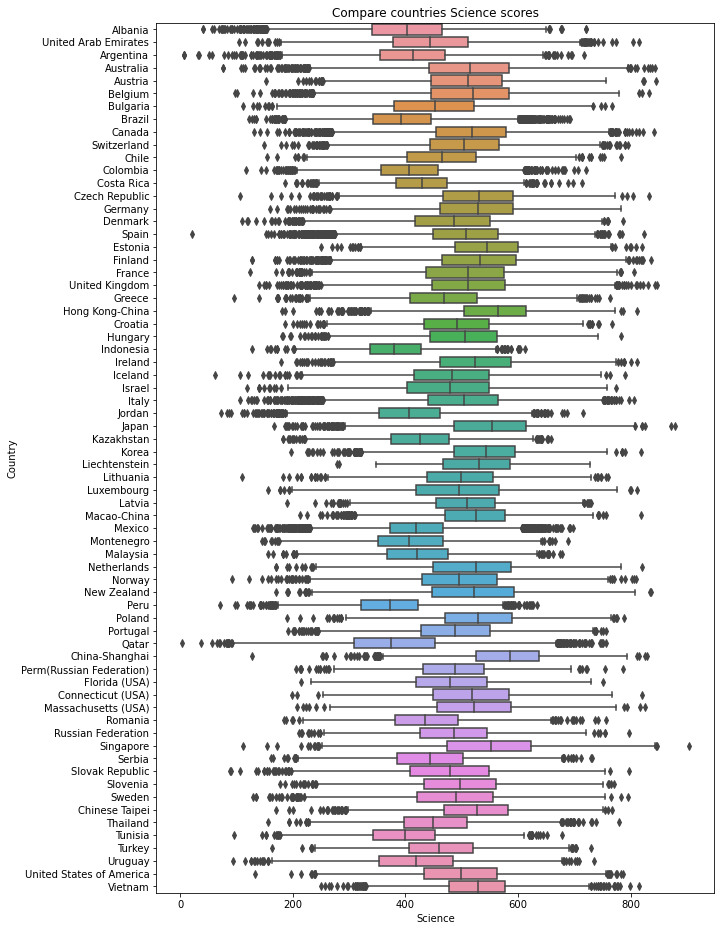

In [83]:
plt.figure(figsize=[10,16]);
plt.title("Compare countries Math scores")
sb.boxplot(data= df, x= 'Math', y ='Country');

plt.figure(figsize=[10,16]);
plt.title("Compare countries Reading scores")
sb.boxplot(data= df, x= 'Reading', y ='Country');

plt.figure(figsize=[10,16]);
plt.title("Compare countries Science scores")
sb.boxplot(data= df, x= 'Science', y ='Country');

<Figure size 432x288 with 0 Axes>

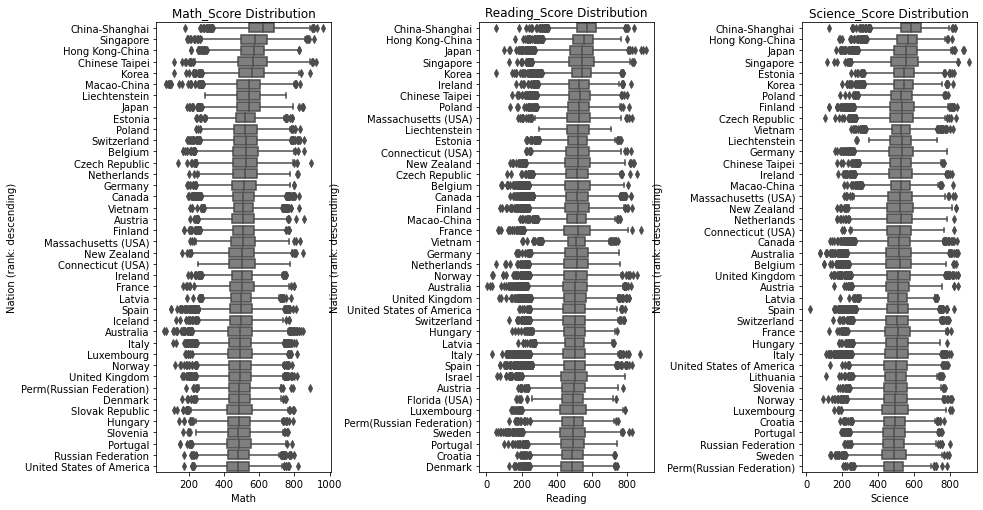

In [84]:
plt.suptitle("PISA's Math, Reading and Science Scores Top-down Rankings", fontsize = 14, weight = "bold", y = 1.04)
plt.figure(figsize=[14.70, 8.27])
plt.subplots_adjust(wspace = 0.85) 

math_score_country_order = df.groupby('Country')['Math'].mean().sort_values(ascending = False).head(40)
reading_score_country_order = df.groupby('Country')['Reading'].mean().sort_values(ascending = False).head(40)
science_score_country_order = df.groupby('Country')['Science'].mean().sort_values(ascending = False).head(40)

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Math'], y = df['Country'], order = math_score_country_order.index, color = sb.color_palette()[7]);
plt.ylabel('Nation (rank: descending)');
plt.title('Math_Score Distribution');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Reading'], y = df['Country'], order = reading_score_country_order.index, color = sb.color_palette()[7]);
plt.ylabel('Nation (rank: descending)');
plt.title('Reading_Score Distribution');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Science'], y = df['Country'], order = science_score_country_order.index, color = sb.color_palette()[7]);
plt.ylabel('Nation (rank: descending)');
plt.title('Science_Score Distribution');






Here we can see that China-Shanghai scores the best in all 3 tests. Hong-Kong China and Singapore and make up the top 5 in all 3 categories

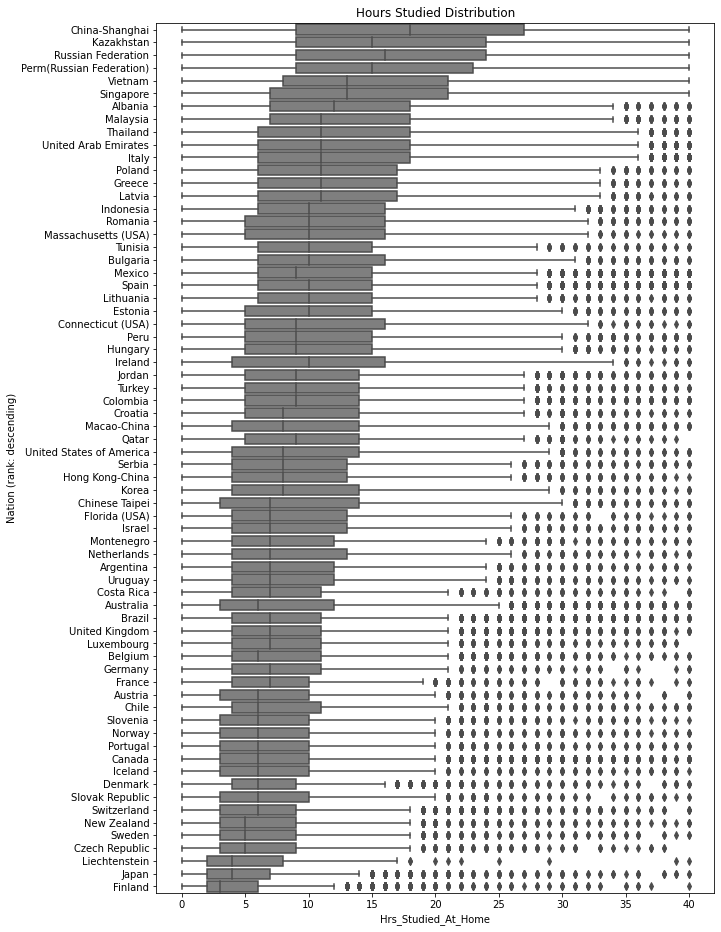

In [85]:
Hrs_studied_country_order = df.groupby('Country')['Hrs_Studied_At_Home'].mean().sort_values(ascending = False)
plt.figure(figsize=[10,16]);
sb.boxplot(x = df['Hrs_Studied_At_Home'], y = df['Country'], order = Hrs_studied_country_order.index, color = sb.color_palette()[7]);
plt.ylabel('Nation (rank: descending)');
plt.title('Hours Studied Distribution');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

A lot of the data here confirmed some of the trends I had seen when dealing with univariate charts. As seen in the in my scatterplots there is definitely an advantage for those who have a high wealth index compared to those who do not. The edge to having a high wealth_index is remarkably consistent amongst math, reading, and science. Most of the OECD countries who have a higher wealth index scored reasonably high, despite not studiyng as many hours per week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

One thing I found interesting was how some countries worked incredibly hard and the results clerly was Shanghai and , who had students doing more homework than any other nation, and achieved the best test results in all 3 categories.

However, this wasn't necessarily a trend. The 3 countries that studied the least, Japan, Finland, and  Liechenstein, all scored above average on the tests. Now that we can confirm that wealth has a great impact I want to see what that is. What resources that more affluent students could have that could give them a leg up on less affluent students.

## Multivariate Exploration



In [86]:
def barplot_scores(data, var, title):
    # Group data by var and calculate mean scores
    data = data.groupby(var)[['Math', 'Reading', 'Science']].mean()

    # Plot barplot
    ax = data.plot.bar(rot=0)
    plt.ylabel('Scores')
    plt.title(title)
    
    return ax

<AxesSubplot:title={'center':'Scores for Students With and Without Textbooks'}, xlabel='Textbooks', ylabel='Scores'>

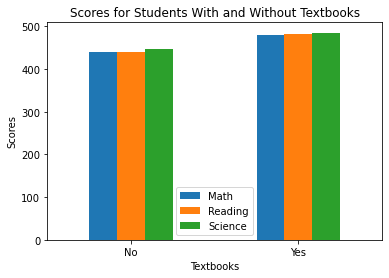

In [87]:
barplot_scores(df, 'Textbooks', 'Scores for Students With and Without Textbooks')

<AxesSubplot:title={'center':'Scores for Students With and Without Internet at School'}, xlabel='Internet at school', ylabel='Scores'>

/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


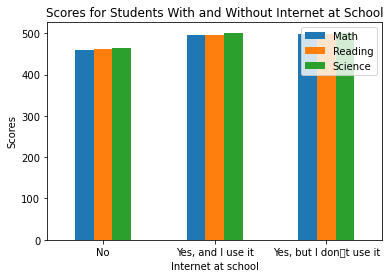

In [88]:
barplot_scores(df, 'Internet at school', 'Scores for Students With and Without Internet at School')

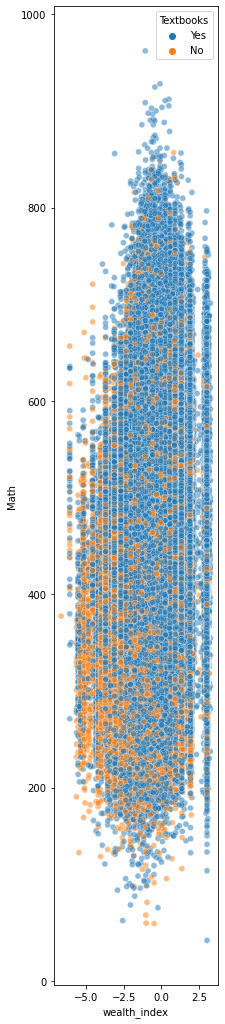

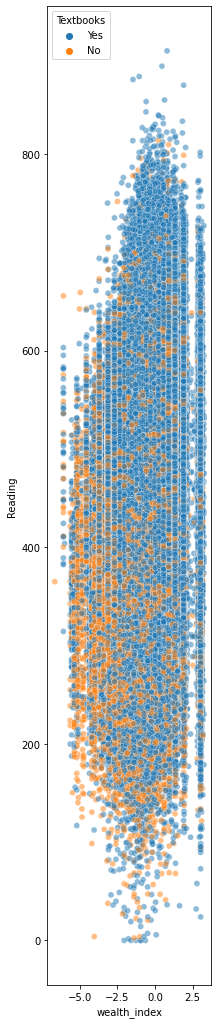

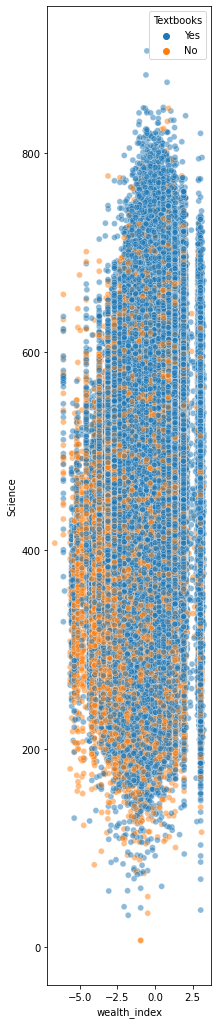

In [89]:
plt.figure(figsize=[10,18]);
plt.subplot(1,3,1)
sb.scatterplot(data = df, x = 'wealth_index', y = 'Math', x_jitter=0.3, hue='Textbooks', alpha=.5);

plt.figure(figsize=[10,18]);
plt.subplot(1, 3, 2)
sb.scatterplot(data = df, x = 'wealth_index', y = 'Reading', x_jitter=0.3, hue='Textbooks', alpha=.5);

plt.figure(figsize=[10,18]);
plt.subplot(1,3,3)
sb.scatterplot(data = df, x = 'wealth_index', y = 'Science', x_jitter=0.3, hue='Textbooks', alpha=.5);

/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


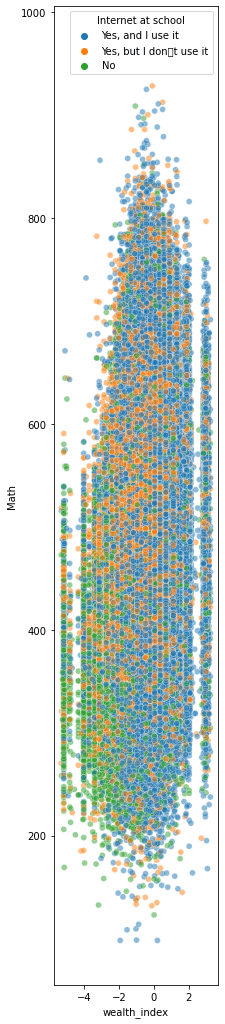

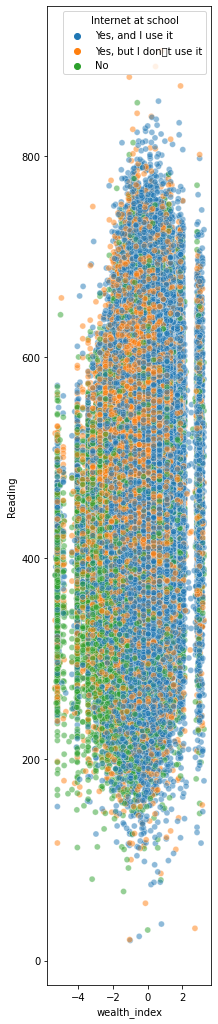

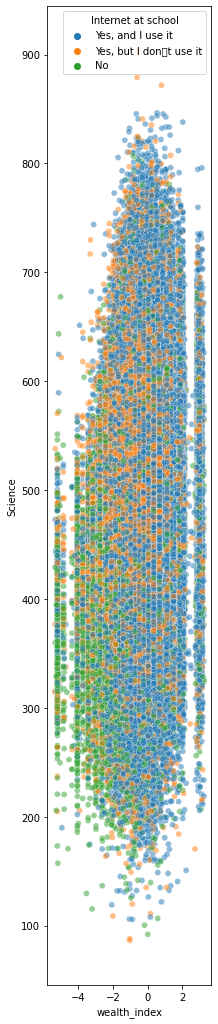

In [90]:
#Compare the students without internet connection at their school do on tests to the ones who don't. Then see if their wealth index is an indicator.


plt.figure(figsize=[10,18]);
plt.subplot(1,3,1)
sb.scatterplot(data = df, x = 'wealth_index', y = 'Math', x_jitter=0.3, hue='Internet at school', alpha=.5);

plt.figure(figsize=[10,18]);
plt.subplot(1, 3, 2)
sb.scatterplot(data = df, x = 'wealth_index', y = 'Reading', x_jitter=0.3, hue='Internet at school', alpha=.5);

plt.figure(figsize=[10,18]);
plt.subplot(1,3,3)
sb.scatterplot(data = df, x = 'wealth_index', y = 'Science', x_jitter=0.3, hue='Internet at school', alpha=.5);


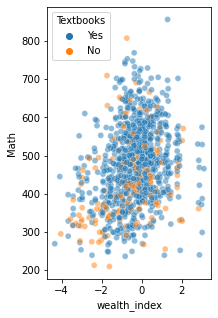

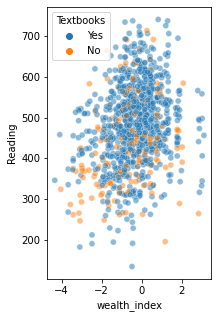

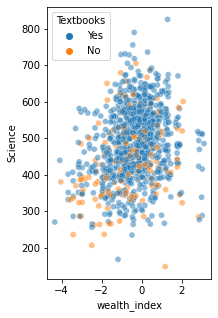

In [100]:
# create a sample from df
df_subset = df.sample(1000, random_state=42)

plt.figure(figsize=[10,5]);
plt.subplot(1,3,1)
sb.scatterplot(data = df_subset, x = 'wealth_index', y = 'Math', x_jitter=0.3, hue='Textbooks', alpha=.5);

plt.figure(figsize=[10,5]);
plt.subplot(1, 3, 2)
sb.scatterplot(data = df_subset, x = 'wealth_index', y = 'Reading', x_jitter=0.3, hue='Textbooks', alpha=.5);

plt.figure(figsize=[10, 5]);
plt.subplot(1,3,3)
sb.scatterplot(data = df_subset, x = 'wealth_index', y = 'Science', x_jitter=0.3, hue='Textbooks', alpha=.5);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

What my studies show is that sutdents who have a lower wealth index are less likely to be getting the resources, (such as textbooks and internet connection that they need for to succeed in order get better test scores. 
### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!